#  When will I get my money back? The fall of the SP500 in 2022

**by Giancarlo Marchesi**

This notebook studies the current losses of the S&P 500 index during 2022. Although I study data since 1985, the latest fall is only comparable to those in this century. I aim to answer the simple question: When will I get back the money I've lost this year? I study the behavior of the index using monthly prices and caveat for the current inflation and fed funds rate environment. 

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
warnings.filterwarnings('ignore')

In [130]:
df=pd.read_csv('data.csv', sep=';')

In [131]:
df.head()

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation
0,Jan-85,179.63,dark green,0.0079,0.007851,0.050196,0.102487,0.197830,0.304328,0.673945,0.098915,0.101443,0.134789,8.35,3.5
1,Feb-85,181.18,dark green,0.0086,0.007627,0.049871,0.102846,0.198096,0.304625,0.674101,0.099048,0.101542,0.134820,8.50,3.5
2,Mar-85,180.66,dark green,-0.0029,-0.002870,0.049301,0.103222,0.198794,0.304956,0.674278,0.099397,0.101652,0.134856,8.58,3.7
3,Apr-85,179.83,dark green,-0.0046,-0.004594,0.049000,0.103476,0.199200,0.305221,0.674601,0.099600,0.101740,0.134920,8.27,3.7
4,May-85,189.55,dark green,0.0541,0.054051,0.048677,0.103576,0.199594,0.305088,0.674396,0.099797,0.101696,0.134879,7.97,3.8


In [132]:
df['fedfunds']=df['fedfunds']/100

In [133]:
df['inflation']=df['inflation']/100

In [134]:
df.head(3)

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation
0,Jan-85,179.63,dark green,0.0079,0.007851,0.050196,0.102487,0.197830,0.304328,0.673945,0.098915,0.101443,0.134789,0.0835,0.035
1,Feb-85,181.18,dark green,0.0086,0.007627,0.049871,0.102846,0.198096,0.304625,0.674101,0.099048,0.101542,0.134820,0.0850,0.035
2,Mar-85,180.66,dark green,-0.0029,-0.002870,0.049301,0.103222,0.198794,0.304956,0.674278,0.099397,0.101652,0.134856,0.0858,0.037


In [135]:
df.shape

(453, 15)

## What happened to the stock market in the last 12 months?

In [136]:
lastyear=df.tail(12)

In [137]:
lastyear

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation
441,Oct-21,4605.38,dark green,0.0691,0.069144,0.101457,0.408390,0.516145,0.698312,1.214806,0.258072,0.232771,0.242961,0.0008,0.062
442,Nov-21,4567.00,dark green,-0.0083,-0.008334,0.086318,0.261034,0.454005,0.654608,1.195240,0.227002,0.218203,0.239048,0.0008,0.068
443,Dec-21,4766.18,dark green,0.0436,0.043613,0.109059,0.268927,0.475241,0.901263,1.331859,0.237621,0.300421,0.266372,0.0008,0.070
444,Jan-22,4515.55,dark green,-0.0526,-0.052585,0.027368,0.215740,0.399945,0.669890,1.327315,0.199972,0.223297,0.265463,0.0008,0.075
445,Feb-22,4373.94,dark green,-0.0314,-0.031361,-0.032888,0.147669,0.480574,0.570823,1.263675,0.240287,0.190274,0.252735,0.0008,0.079
446,Mar-22,4530.41,dark green,0.0358,0.035773,0.051740,0.140331,0.752854,0.598366,1.199506,0.376427,0.199455,0.239901,0.0020,0.085
447,Apr-22,4131.93,dark green,-0.0880,-0.087957,-0.102804,-0.011777,0.418723,0.402637,1.000644,0.209361,0.134212,0.200129,0.0033,0.083
448,May-22,4132.15,dark green,0.0001,0.000053,-0.095216,-0.017117,0.357335,0.501475,0.970552,0.178668,0.167158,0.194110,0.0077,0.086
449,Jun-22,3785.38,orange,-0.0839,-0.083920,-0.205783,-0.119167,0.220976,0.286774,0.803541,0.110488,0.095591,0.160708,0.0121,0.091
450,Jul-22,4130.29,orange,0.0911,0.091116,-0.085319,-0.060285,0.262653,0.385827,0.900207,0.131327,0.128609,0.180041,0.0158,0.085


In [138]:
(4766.18-3585.62)/4766.18

0.2476952192321734

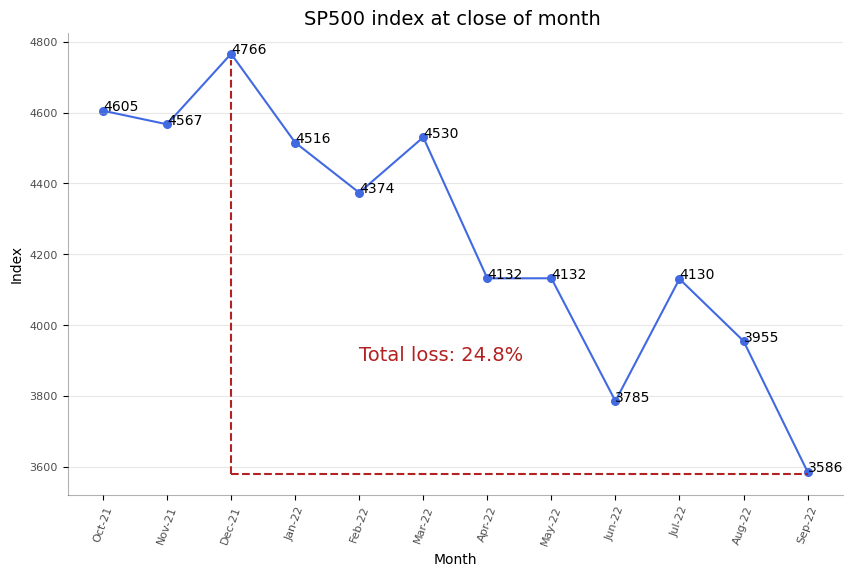

In [228]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(lastyear.month, lastyear.close, color='royalblue')
plt.scatter(x=lastyear.month, y=lastyear.close, s=30, color='royalblue')
plt.xticks(rotation=70, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.title("SP500 index at close of month ", fontsize=14)
plt.xlabel('Month', fontsize=10)
plt.ylabel('Index', fontsize=10)

## Annotation
for i in lastyear.index:
    plt.text(lastyear.month[i], lastyear.close[i], "{:.0f}".format(lastyear.close[i]))

plt.text(4, 3900, 'Total loss: 24.8%', color='firebrick', fontsize=14 )
plt.vlines(2, 3580, 4750, color="firebrick", linestyles="--")
plt.hlines(3580, 2, 11, color="firebrick", linestyles="--")

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='y', alpha=.3)
plt.show()

## Some historical context on the losses

In [140]:
## let's create a variable for ten month changes in price an look at its distribution
d10m=[]
for i in df.index: 
    if i <9: 
        d10m.append(0)
    else: 
        d10m.append((df['close'][i]/df['close'][i-9])-1)

In [141]:
df['d10m']=d10m

In [142]:
df.tail(24)

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation,d10m
429,Oct-20,3269.96,light green,-0.0277,-0.027666,0.122760,0.076509,0.205853,0.269759,0.620356,0.102927,0.089920,0.124071,0.0009,0.012,0.013778
430,Nov-20,3621.63,dark green,0.1075,0.107546,0.189639,0.153025,0.312104,0.367902,0.751644,0.156052,0.122634,0.150329,0.0009,0.012,0.225918
431,Dec-20,3756.07,dark green,0.0371,0.037121,0.211522,0.162589,0.498323,0.404868,0.824309,0.249161,0.134956,0.164862,0.0009,0.014,0.453256
432,Jan-21,3714.24,dark green,-0.0111,-0.011137,0.135464,0.151517,0.373559,0.315329,0.861784,0.186779,0.105110,0.172357,0.0009,0.014,0.275306
433,Feb-21,3811.15,dark green,0.0261,0.026091,0.088804,0.290070,0.368707,0.404344,0.810953,0.184353,0.134781,0.162191,0.0008,0.017,0.251893
434,Mar-21,3972.89,dark green,0.0424,0.042439,0.181353,0.537145,0.401669,0.504387,0.921229,0.200834,0.168129,0.184246,0.0007,0.026,0.281458
435,Apr-21,4181.17,dark green,0.0524,0.052425,0.278661,0.435629,0.419352,0.578962,1.004867,0.209676,0.192987,0.200973,0.0007,0.042,0.278207
436,May-21,4204.11,dark green,0.0055,0.005487,0.160834,0.380973,0.527623,0.554045,0.994937,0.263811,0.184682,0.198987,0.0006,0.050,0.201068
437,Jun-21,4297.50,dark green,0.0222,0.022214,0.144148,0.386161,0.460860,0.580911,1.083020,0.230430,0.193637,0.216604,0.0008,0.054,0.277877
438,Jul-21,4395.26,dark green,0.0227,0.022748,0.183354,0.343656,0.474731,0.560656,1.089161,0.237366,0.186885,0.217832,0.0010,0.054,0.344133


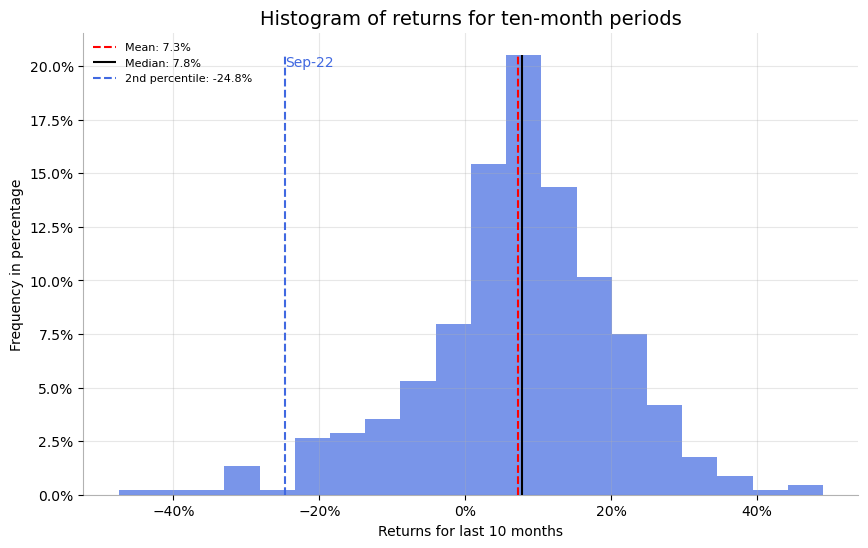

In [297]:
plt.figure(figsize=(10,6))
## Calculations and setting up the plot 
S= df.d10m
mu=S.mean()
M=S.median()
plt.hist(S, bins=20, weights=np.ones_like(S) / len(S), color='royalblue',alpha = 0.7)

## Titles
plt.title('Histogram of returns for ten-month periods', fontsize=14)
plt.xlabel('Returns for last 10 months')
plt.ylabel('Frequency in percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

## Addding mean and median lines 
plt.vlines(mu, 0, 0.205, color="red", linestyles="--", label='mean')
plt.vlines(M, 0, 0.205, color="black", linestyles="-", label='median')
plt.vlines(-0.247, 0, 0.205, color="royalblue", linestyles="--", label='last 10 months')
plt.legend(['Mean:'+' '+'{:.1%}'.format(mu), 'Median:'+' '+'{:.1%}'.format(M), '2nd percentile:'+' '+'{:.1%}'.format(-0.248)], prop ={'size': 8}, loc='upper left', edgecolor='none', facecolor='none')
plt.text(-0.247, 0.20, 'Sep-22', color="royalblue")  

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

**Extreme fall:**  
The fall of the last ten months ranks in the 2nd percentile of returns, i.e. very unlikely.  

In [ ]:
df

In [144]:
worse=df[df['d10m']<-0.248]

In [145]:
worse.shape

(9, 16)

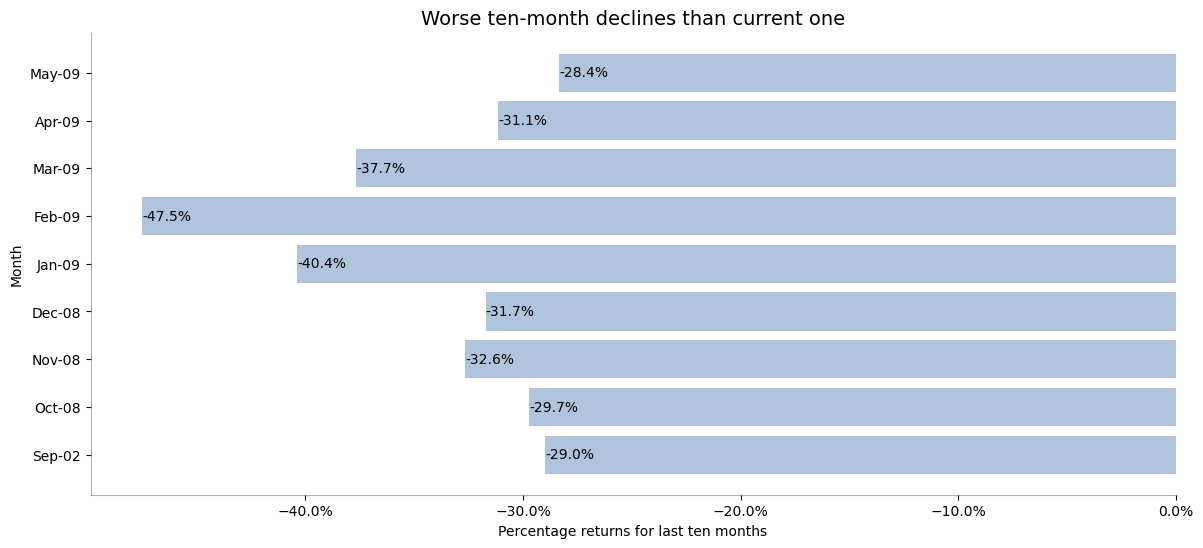

In [229]:
plt.figure(figsize=(14,6))


plt.barh(worse['month'], worse['d10m'], color='lightsteelblue')

## Titles
plt.title('Worse ten-month declines than current one', fontsize=14)
plt.xlabel('Percentage returns for last ten months', fontsize=10)
plt.ylabel('Month', fontsize=10)
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
## Annotation
for i in worse.index:
    plt.text(worse.d10m[i], worse.month[i] , "{:.1%}".format(worse.d10m[i]), ha='left',va='center', color='black')

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.show()

**Bad company:**  
The only two other times we have seen ten-month falls similar to this one were during the lowest point of the dot.com boom, post 9/11, and during the worst months of the great recession. 

In [147]:
last36mo=df[df.index>416]

In [148]:
last36mo.head(3)

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation,d10m
417,Oct-19,3037.56,orange,0.0204,0.020432,0.031139,0.120152,0.179516,0.428667,0.729286,0.089758,0.142889,0.145857,0.0183,0.018,0.123316
418,Nov-19,3140.98,orange,0.0340,0.034047,0.141320,0.137966,0.186359,0.428491,0.739375,0.093179,0.142830,0.147875,0.0155,0.021,0.128027
419,Dec-19,3230.78,orange,0.0286,0.028590,0.098247,0.288781,0.208396,0.443066,0.747917,0.104198,0.147689,0.149583,0.0155,0.023,0.139846


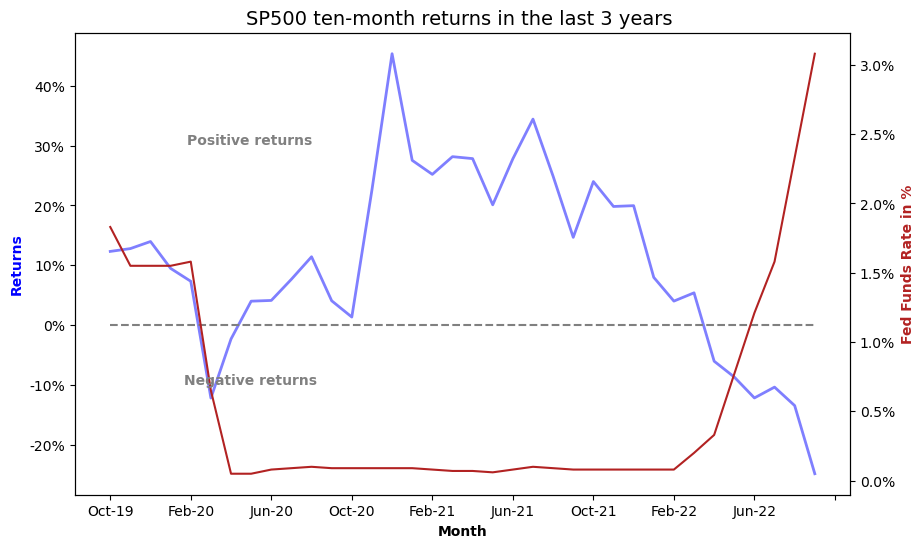

In [165]:
# Draw plot
## Ranking by number of flights
x=last36mo.month
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, last36mo.d10m, color='blue', alpha=0.5, linewidth=2)
ax.set_title('SP500 ten-month returns in the last 3 years ', fontdict={'size':14})
ax.set_ylabel('Returns', color='blue', fontweight ='bold')
ax.set_xlabel('Month', fontweight ='bold')
ax.set_xticks([])
vals1 = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals1])
loc = mtick.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.hlines(0.00, 0, 35, color="grey", linestyles="--" )
fig.text(0.3, 0.7, 'Positive returns', ha='center',va='center', color='grey', fontweight ='bold' ) 
fig.text(0.3, 0.3, 'Negative returns', ha='center',va='center', color='grey', fontweight ='bold' ) 

## Draw the pareto line
ax2=ax.twinx()
ax2.plot(x, last36mo.fedfunds ,color="firebrick")
ax2.set_ylabel("Fed Funds Rate in %", color="firebrick", fontweight ='bold')
vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.1%}'.format(x) for x in vals2])

plt.show()


**Pendulum moment:**  
After the intital six months of COVID, returns increased aggresively. As rates have tightened, returns have decreased substantially.  

## Months to peak and trough

In [166]:
df2=pd.read_csv('peak.csv', sep=';')

In [167]:
df2.head()

,months,dotcom,greatrecession,covid2020,inflation
0,1,1.00,1.00,1.00,1.00
1,2,0.95,0.96,1.00,0.95
2,3,0.94,0.95,0.91,0.92
3,4,0.87,0.89,0.80,0.95
4,5,0.87,0.86,0.90,0.87


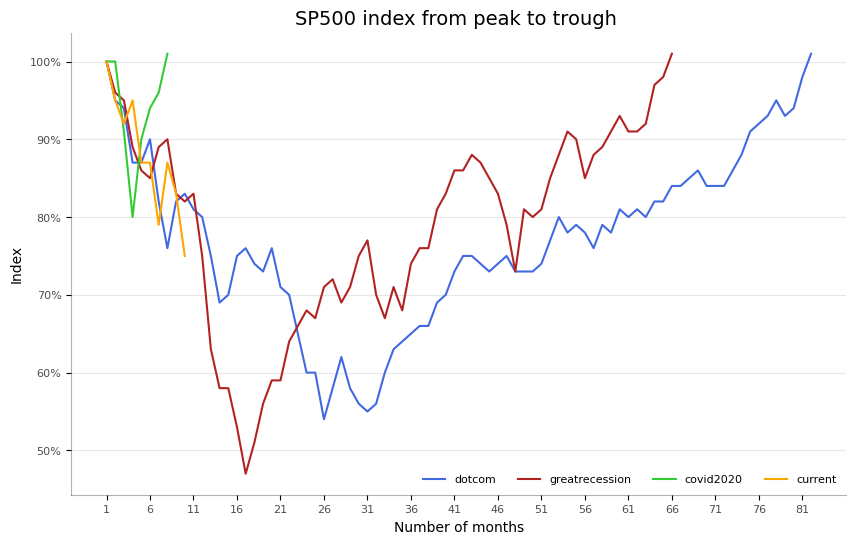

In [221]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df2.months, df2.dotcom, color='royalblue', label='dotcom')
ax.plot(df2.months, df2.greatrecession, color='firebrick', label='greatrecession')
ax.plot(df2.months, df2.covid2020, color='limegreen', label='covid2020')
ax.plot(df2.months, df2.inflation, color='orange', label='current')
vals1 = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals1])
loc = mtick.IndexLocator(base=5, offset=0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

## Titltes and ticks 
plt.xticks(fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.title("SP500 index from peak to trough ", fontsize=14)
plt.xlabel('Number of months', fontsize=10)
plt.ylabel('Index', fontsize=10)
plt.legend(prop ={'size': 8}, loc='lower right', edgecolor='none', facecolor='none', ncol=4)

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='y', alpha=.3)
plt.show()

**How bad could it get?:**  
The dotcom bubble lost ~44% from peak and the great recession ~53%. 

## The curious case of the percentage decrease

Although the SP500 index lost ~25% of its value, it will need a 33% increase to recuperate its original level. Why? Because the denominators of the quotients are different. The absolute value of the loss is 1180 index points. From the point of view of the loss, the denominator is 4766, but from the point of view of the recovery, the denominator is 3568. Only two cycles have losses of ~25%. If 25% were the through, how long would it take to recuperate 33%? 

In [183]:
df2['dotcom'].min()

0.54

In [184]:
df2[df2['dotcom']==0.54]

,months,dotcom,greatrecession,covid2020,inflation
25,26,0.54,0.71,NaN,NaN


In [188]:
df2[(df2['dotcom']>(0.54*1.33)) & (df2.index>25)]

,months,dotcom,greatrecession,covid2020,inflation
40,41,0.73,0.86,NaN,NaN
41,42,0.75,0.86,NaN,NaN
42,43,0.75,0.88,NaN,NaN
43,44,0.74,0.87,NaN,NaN
44,45,0.73,0.85,NaN,NaN
45,46,0.74,0.83,NaN,NaN
46,47,0.75,0.79,NaN,NaN
47,48,0.73,0.73,NaN,NaN
48,49,0.73,0.81,NaN,NaN
49,50,0.73,0.80,NaN,NaN


In [189]:
df2['greatrecession'].min()

0.47

In [190]:
df2[df2['greatrecession']==0.47]

,months,dotcom,greatrecession,covid2020,inflation
16,17,0.76,0.47,NaN,NaN


In [191]:
df2[(df2['greatrecession']>(0.47*1.33)) & (df2.index>16)]

,months,dotcom,greatrecession,covid2020,inflation
21,22,0.70,0.64,NaN,NaN
22,23,0.65,0.66,NaN,NaN
23,24,0.60,0.68,NaN,NaN
24,25,0.60,0.67,NaN,NaN
25,26,0.54,0.71,NaN,NaN
26,27,0.58,0.72,NaN,NaN
27,28,0.62,0.69,NaN,NaN
28,29,0.58,0.71,NaN,NaN
29,30,0.56,0.75,NaN,NaN
30,31,0.55,0.77,NaN,NaN


In [194]:
df3=df2[['months','dotcom','greatrecession']]

In [199]:
df3.loc[df3.index > 40, 'dotcom'] = 'NaN'

In [200]:
df3.loc[df3.index > 21, 'greatrecession'] = 'NaN'

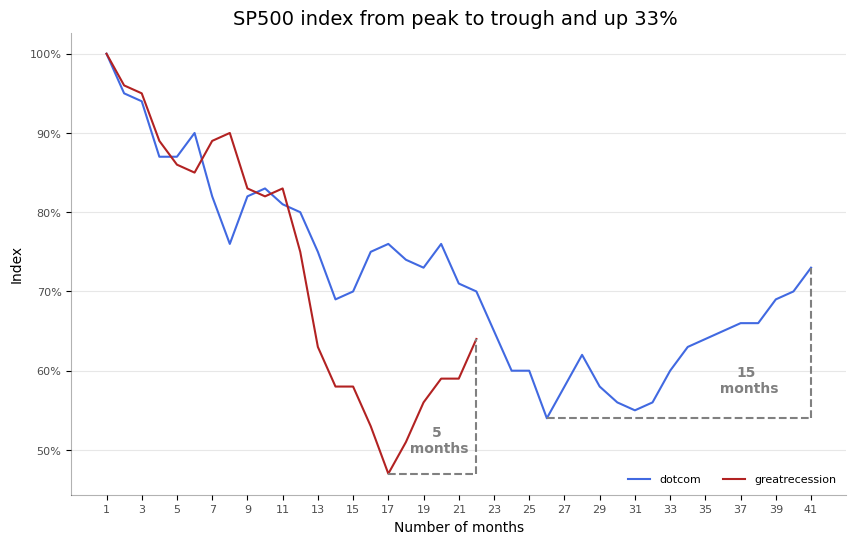

In [227]:
# Draw Plot
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(df3.months, df3.dotcom, color='royalblue', label='dotcom')
ax.plot(df3.months, df3.greatrecession, color='firebrick', label='greatrecession')
vals1 = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals1])
loc = mtick.IndexLocator(base=2, offset=0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

## Titltes and ticks 
plt.xticks(fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=8, alpha=.7)
plt.title("SP500 index from peak to trough and up 33% ", fontsize=14)
plt.xlabel('Number of months', fontsize=10)
plt.ylabel('Index', fontsize=10)
plt.legend(prop ={'size': 8}, loc='lower right', edgecolor='none', facecolor='none', ncol=4)
plt.hlines(0.47, 17, 22, color="grey", linestyles="--" )
plt.vlines(22, 0.47, 0.64, color="grey", linestyles="--")
fig.text(0.49, 0.2, '5\n months', ha='center',va='center', color='grey', fontweight ='bold' )
plt.hlines(0.54, 26, 41, color="grey", linestyles="--" )
plt.vlines(41, 0.54, 0.73, color="grey", linestyles="--")
fig.text(0.8, 0.3, '15\n months', ha='center',va='center', color='grey', fontweight ='bold' )

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='y', alpha=.3)
plt.show()

**Speed counts:**  
The dotcom recession took longer to get to the through than the great recession and, hence, took longer to rebound 33 percent. 

In [269]:
df[df['month']=='Nov-08']

,month,close,color,d1m,d3m,d6m,d12m,d2Y,d3Y,d5Y,d2Ya,d3Ya,d5Ya,fedfunds,inflation,d10m
286,Nov-08,896.24,red,-0.0748,-0.074849,-0.360002,-0.394899,-0.360117,-0.28271,-0.042796,-0.180058,-0.094237,-0.008559,0.0039,0.011,-0.326454


## Interest rates and inflation 

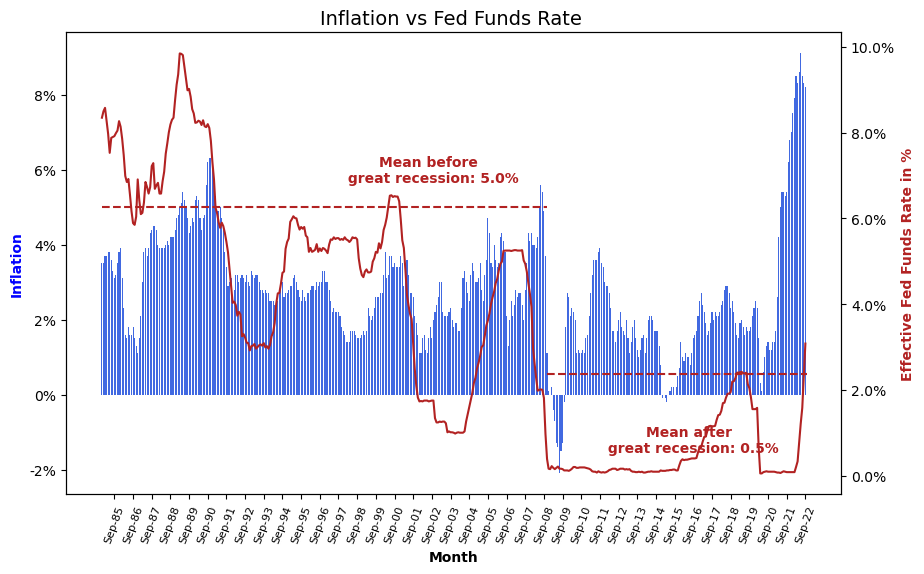

In [295]:
# Draw barchart for inflation
x=df.month
mean_bef=df['fedfunds'][0:286].mean() 
mean_aft=df['fedfunds'][286:].mean() 

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x, df.inflation, color='royalblue', width=0.7)
ax.set_title('Inflation vs Fed Funds Rate ', fontdict={'size':14})
ax.set_ylabel('Inflation', color='blue', fontweight ='bold')
ax.set_xlabel('Month', fontweight ='bold')
vals1 = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals1])
sub = df.month[8::12]
ax.set_xticks(sub)
ax.set_xticklabels(sub, fontdict={'fontsize':8})
ax.tick_params(axis='x', labelrotation= 70)
plt.hlines(mean_bef, 0, 286, color="firebrick", linestyles="--" )
plt.hlines(mean_aft, 286, 453, color="firebrick", linestyles="--" )
fig.text(0.49, 0.65, 'Mean before \n great recession: '+'{:.1%}'.format(mean_bef), ha='center',va='center', color='firebrick', fontweight ='bold' )
fig.text(0.75, 0.20, 'Mean after \n great recession: '+'{:.1%}'.format(mean_aft), ha='center',va='center', color='firebrick', fontweight ='bold' )

## Draw line plot for fed funds rate 
ax2=ax.twinx()
ax2.plot(x, df.fedfunds, color="firebrick")
ax2.set_ylabel("Effective Fed Funds Rate in %", color="firebrick", fontweight ='bold')
vals2 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.1%}'.format(x) for x in vals2])

plt.show()

**Uncharted territory:**  
After a period of exceptionally low rates, COVID supply problems have fueled inflation not seen in 40 years. 

## Stock returns during times of higher fed-funds rates

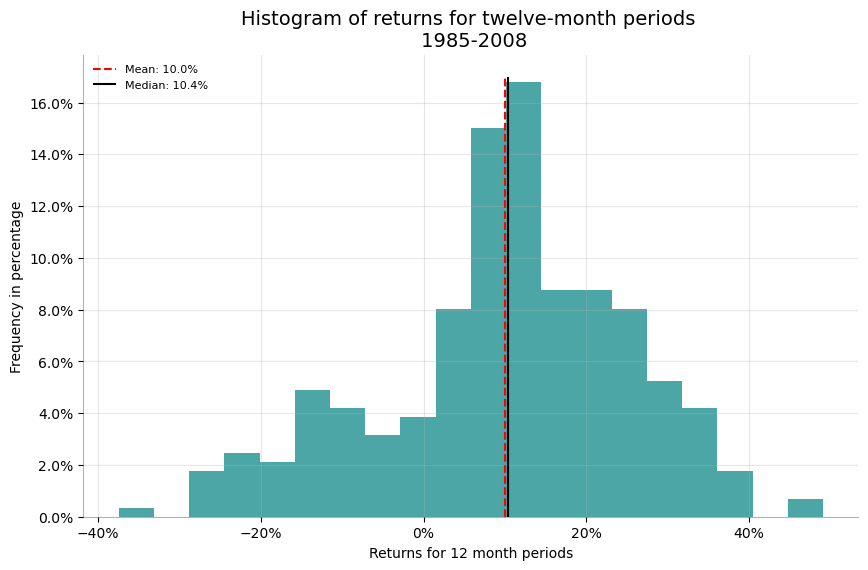

In [300]:
plt.figure(figsize=(10,6))
## Calculations and setting up the plot 
S= df['d12m'][0:286]
mu=S.mean()
M=S.median()
plt.hist(S, bins=20, weights=np.ones_like(S) / len(S), color='teal',alpha = 0.7)

## Titles
plt.title('Histogram of returns for twelve-month periods \n Jan 1985- Oct 2008', fontsize=14)
plt.xlabel('Returns for 12 month periods')
plt.ylabel('Frequency in percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

## Addding mean and median lines 
plt.vlines(mu, 0, 0.17, color="red", linestyles="--", label='mean')
plt.vlines(M, 0, 0.17, color="black", linestyles="-", label='median')
plt.legend(['Mean:'+' '+'{:.1%}'.format(mu), 'Median:'+' '+'{:.1%}'.format(M)], prop ={'size': 8}, loc='upper left', edgecolor='none', facecolor='none')

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

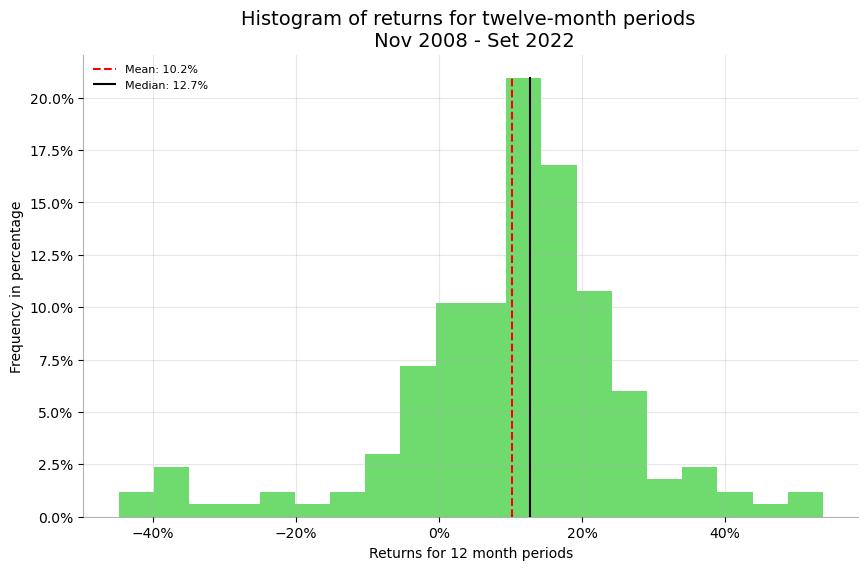

In [302]:
plt.figure(figsize=(10,6))
## Calculations and setting up the plot 
S= df['d12m'][286:]
mu=S.mean()
M=S.median()
plt.hist(S, bins=20, weights=np.ones_like(S) / len(S), color='limegreen',alpha = 0.7)

## Titles
plt.title('Histogram of returns for twelve-month periods \n Nov 2008 - Set 2022', fontsize=14)
plt.xlabel('Returns for 12 month periods')
plt.ylabel('Frequency in percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))

## Addding mean and median lines 
plt.vlines(mu, 0, 0.21, color="red", linestyles="--", label='mean')
plt.vlines(M, 0, 0.21, color="black", linestyles="-", label='median')
plt.legend(['Mean:'+' '+'{:.1%}'.format(mu), 'Median:'+' '+'{:.1%}'.format(M)], prop ={'size': 8}, loc='upper left', edgecolor='none', facecolor='none')

# Remove borders and set grid
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3) 
plt.grid(axis='both', alpha=.3)
plt.show()

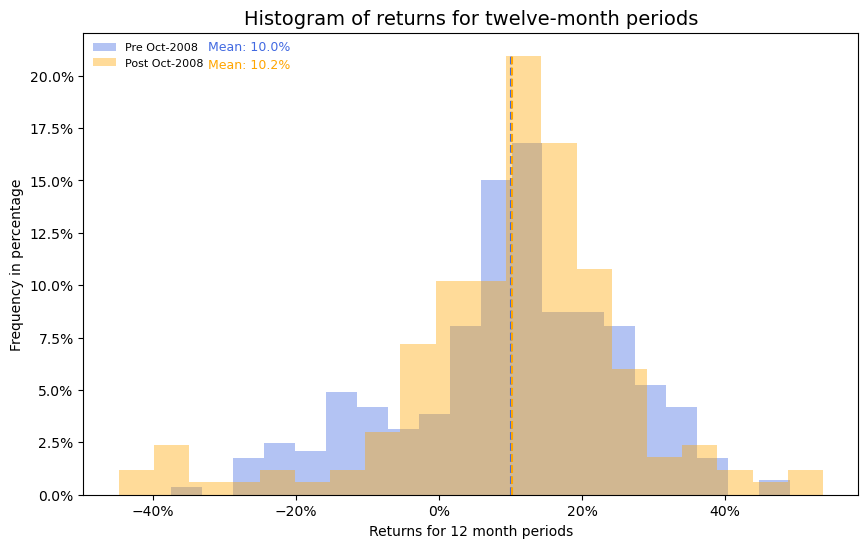

In [332]:
fig, ax = plt.subplots(figsize=(10,6))

## Calculations and setting up the plot 
S= df['d12m'][0:286]
mu=S.mean()
M=S.median()
ax.hist(S, bins=20, weights=np.ones_like(S) / len(S), color='royalblue',alpha = 0.4, label='Pre Oct-2008')

P= df['d12m'][286:]
mup=P.mean()
Mp=P.median()
ax.hist(P, bins=20, weights=np.ones_like(P) / len(P), color='orange',alpha = 0.4, label='Post Oct-2008')
plt.legend(prop ={'size': 8}, loc='upper left', edgecolor='none', facecolor='none')
plt.vlines(mu, 0, 0.21, color="royalblue", linestyles="--", label='mean')
plt.vlines(mup, 0, 0.21, color="orange", linestyles="--", label='mean')
fig.text(0.25, 0.85, 'Mean: '+'{:.1%}'.format(mu), color='royalblue', fontsize=9)
fig.text(0.25, 0.82, 'Mean: '+'{:.1%}'.format(mup), color='orange', fontsize=9 )


## Titles
plt.title('Distribution of returns for twelve-month periods', fontsize=14)
plt.xlabel('Returns for 12 month periods')
plt.ylabel('Frequency in percentage')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))


**The distributions of returns are very similar:**  
There doesn't seem to be much difference in 12-month returns for periods pre and post Oct 2008. 

## Conclusions: 

- This year's S&P500 negative returns (25%) are rare. The market is predicting a recession, like the last two times this happened. 

- In the previous two bear markets (dotcom bubble and great recession), the magnitudes of the falls were greater. The latter was faster than the current fall. 

- A caveat: during the dotcom bubble the price/earnings ratios were historically high, whereas now they are at a reasonable 17x. The great recession was triggered by a global banking crisis. This does not seem to be a problem at this time.  

- From through to a 33% increase, the rebound after the great recession took 5 months, while the dotcom bubble took 15 months. The faster and deeper the fall, the quicker the rebound. 

- Although the fed funds rates is going up, average returns during the period before the great recession 12-month returns are about the same as those during the period of historically low rates.  